<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Rolling Statistics


# Independent Practice

**Instructor Note:** These are optional and can be assigned as student practice questions outside of class.

### 1) Load the Unemployment data set. Perform any necessary cleaning and preprocess the data by creating a `period` index.

In [1]:
import pandas as pd
from datetime import timedelta
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
u = pd.read_csv('./data/unemployment.csv', index_col=['date'], parse_dates=['date'])
u.head()

,unemployment_rate
date,
1948-01-01,3.733
1948-04-01,3.667
1948-07-01,3.767
1948-10-01,3.833
1949-01-01,4.667


In [3]:
u.columns

Index(['unemployment_rate'], dtype='object')

In [4]:
u.dtypes

unemployment_rate    float64
dtype: object

In [5]:
u.shape

(174, 1)

In [6]:
u.isnull().sum()

unemployment_rate    0
dtype: int64

### 2) Plot the unemployment rate.

In [7]:
print("First year:", u.index.min())
print("Last year:", u.index.max())

First year: 1948-01-01 00:00:00
Last year: 1991-04-01 00:00:00


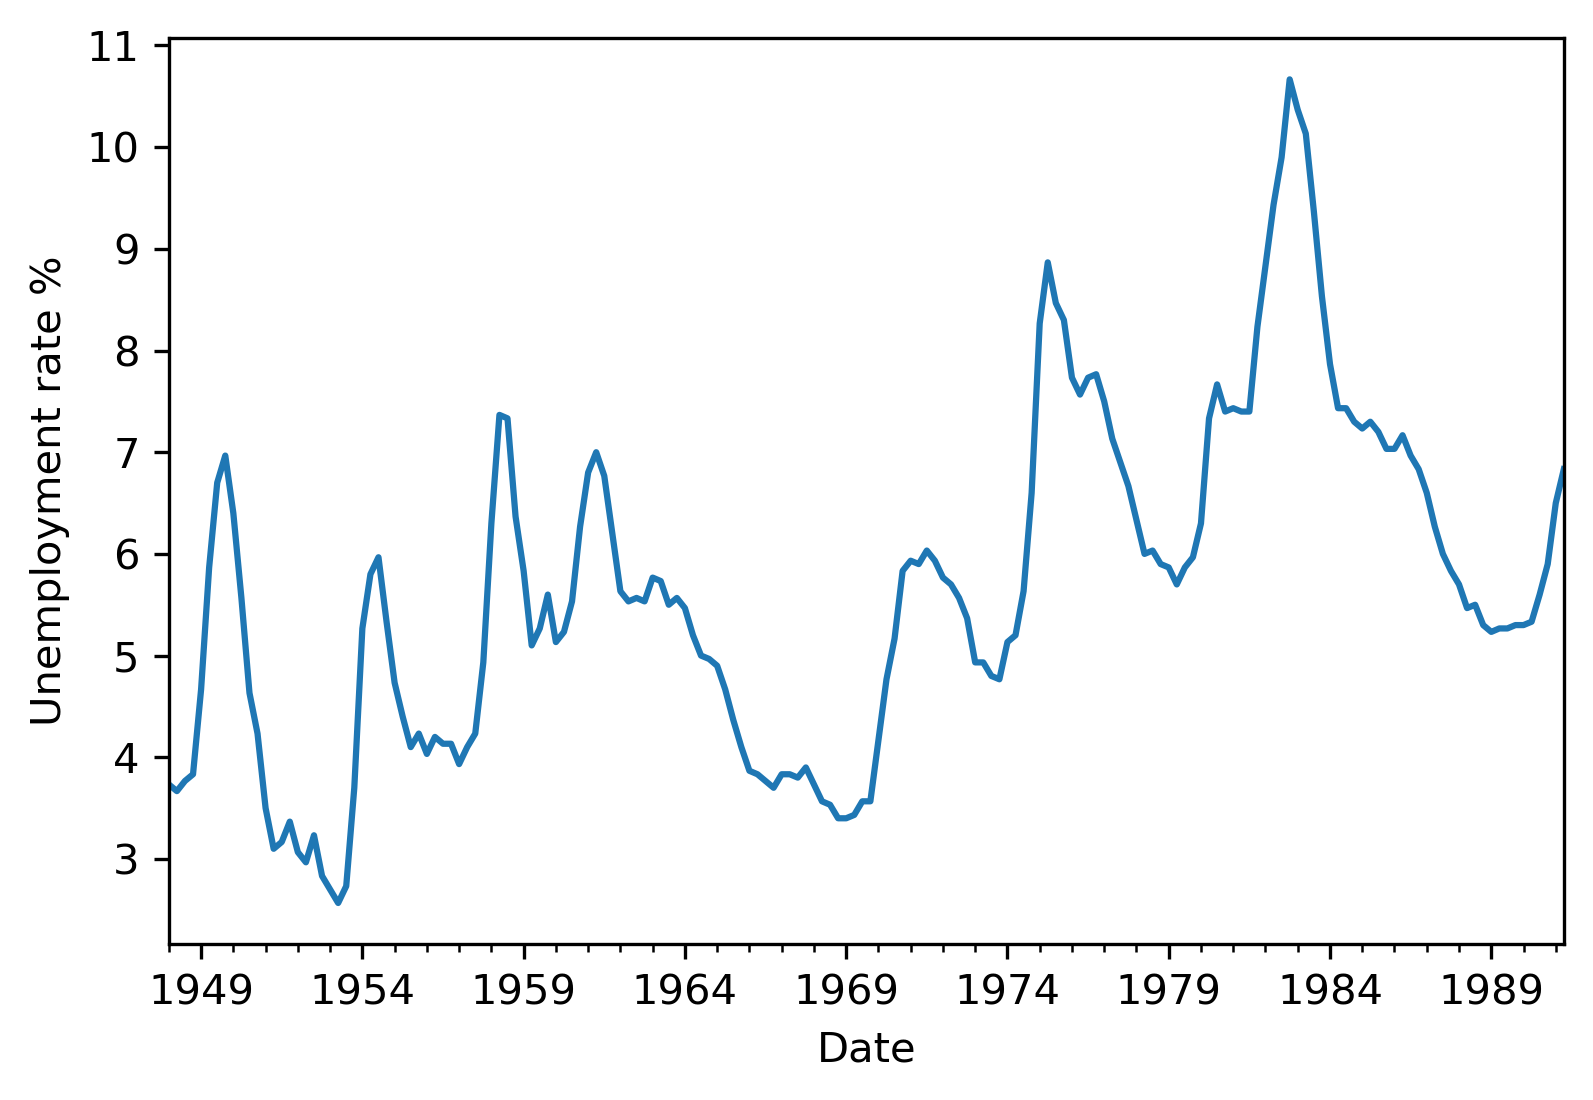

In [8]:
fg, ax = plt.subplots(dpi=300)
u['unemployment_rate'].plot(ax=ax);
plt.xlabel('Date');
plt.ylabel('Unemployment rate %');

### 3) Calculate the rolling mean of years with `window=3 `, without centering, and plot both the unemployment rates and the rolling mean data.

In [9]:
# Average unemployment rate between 1948 and 1991 is approx 5.7%
u['unemployment_rate'].mean()

5.666275862068963

In [10]:
# Rolling window length of 3 observations, i.e. mean measured every 3 months
u['unemployment_rate'].rolling(3).mean()

date
1948-01-01         NaN
1948-04-01         NaN
1948-07-01    3.722333
1948-10-01    3.755667
1949-01-01    4.089000
                ...   
1990-04-01    5.311000
1990-07-01    5.411000
1990-10-01    5.611000
1991-01-01    6.000000
1991-04-01    6.411000
Name: unemployment_rate, Length: 174, dtype: float64

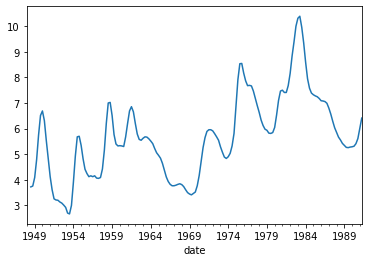

In [11]:
# Looks very similar to true rate
u['unemployment_rate'].rolling(3).mean().plot();

### 4) Calculate the rolling median with `window=5` and `window=15`. Plot both together with the original data.

In [12]:
u['unemployment_rate'].rolling(5).median()

date
1948-01-01      NaN
1948-04-01      NaN
1948-07-01      NaN
1948-10-01      NaN
1949-01-01    3.767
              ...  
1990-04-01    5.300
1990-07-01    5.300
1990-10-01    5.333
1991-01-01    5.600
1991-04-01    5.900
Name: unemployment_rate, Length: 174, dtype: float64

In [13]:
u['unemployment_rate'].rolling(15).median()

date
1948-01-01      NaN
1948-04-01      NaN
1948-07-01      NaN
1948-10-01      NaN
1949-01-01      NaN
              ...  
1990-04-01    5.467
1990-07-01    5.467
1990-10-01    5.467
1991-01-01    5.467
1991-04-01    5.467
Name: unemployment_rate, Length: 174, dtype: float64

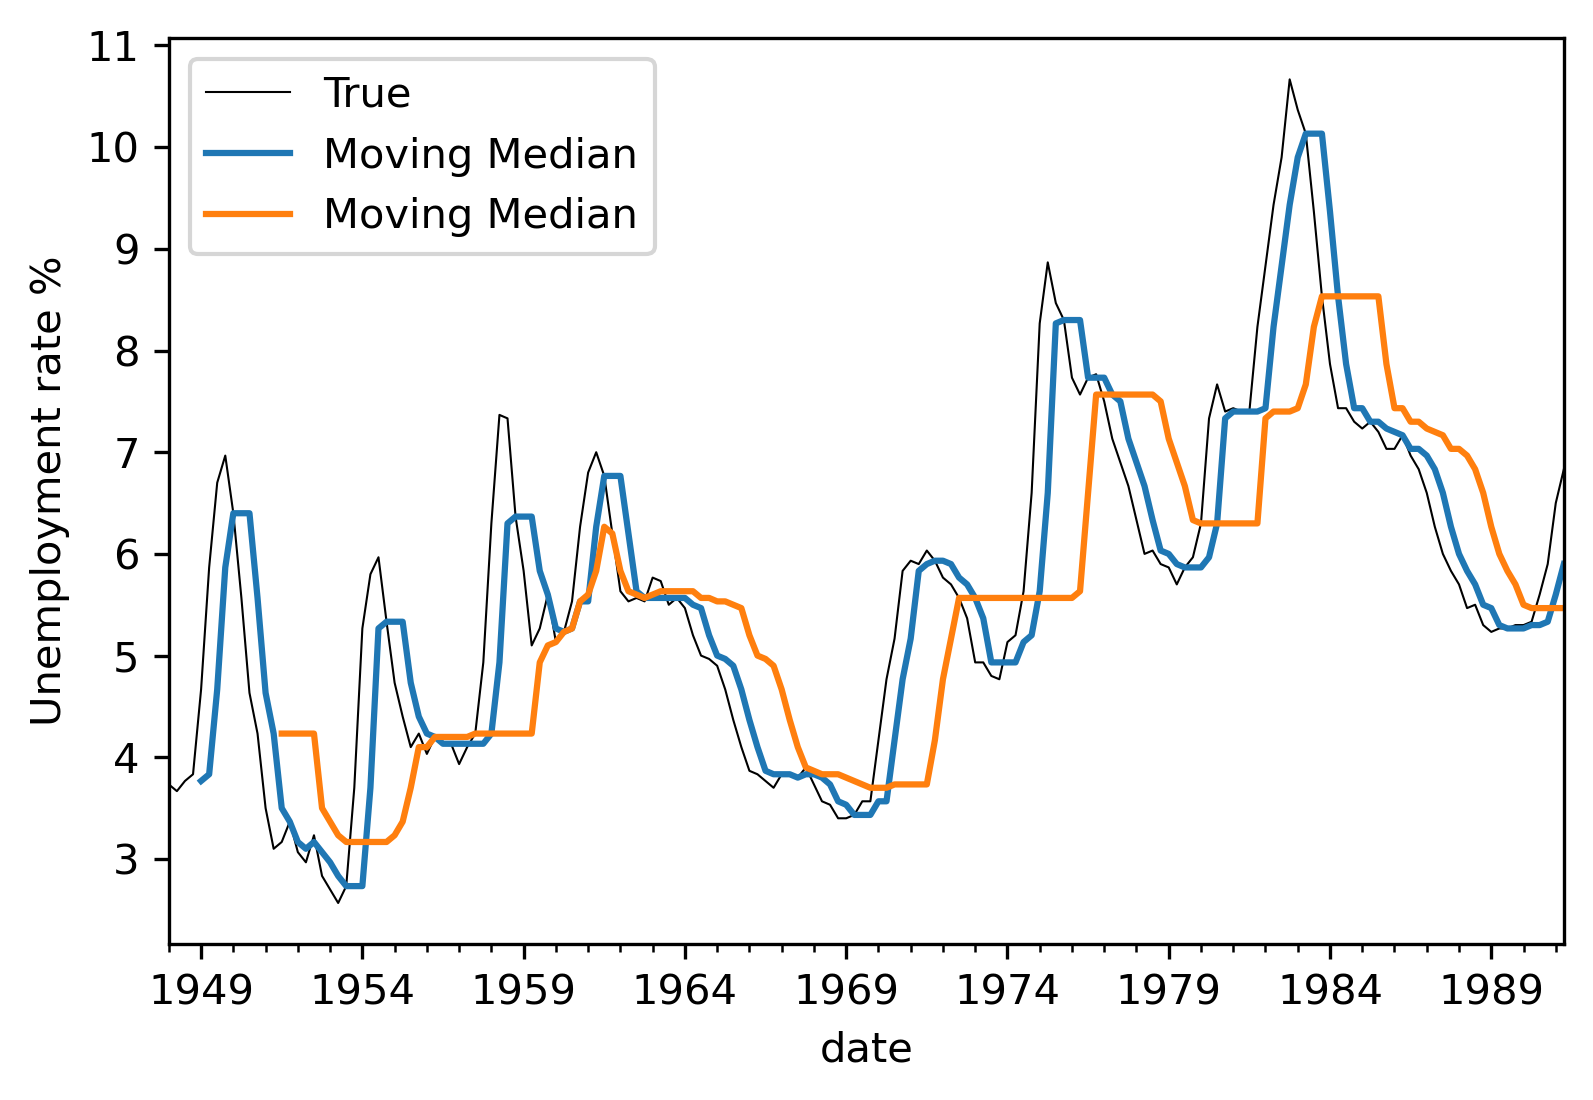

In [14]:
fg, ax = plt.subplots(dpi=300)
u['unemployment_rate'].plot(ax=ax, label='True', color='k', linewidth=0.5)
for window_size in [5, 15]:
    u['unemployment_rate'].rolling(window_size).median().plot(ax=ax, label='Moving Median')
ax.set_ylabel('Unemployment rate %');
ax.legend();

### 5) Calculate and plot the expanding mean. Resample by quarter. Plot the rolling mean and the expanding mean together.

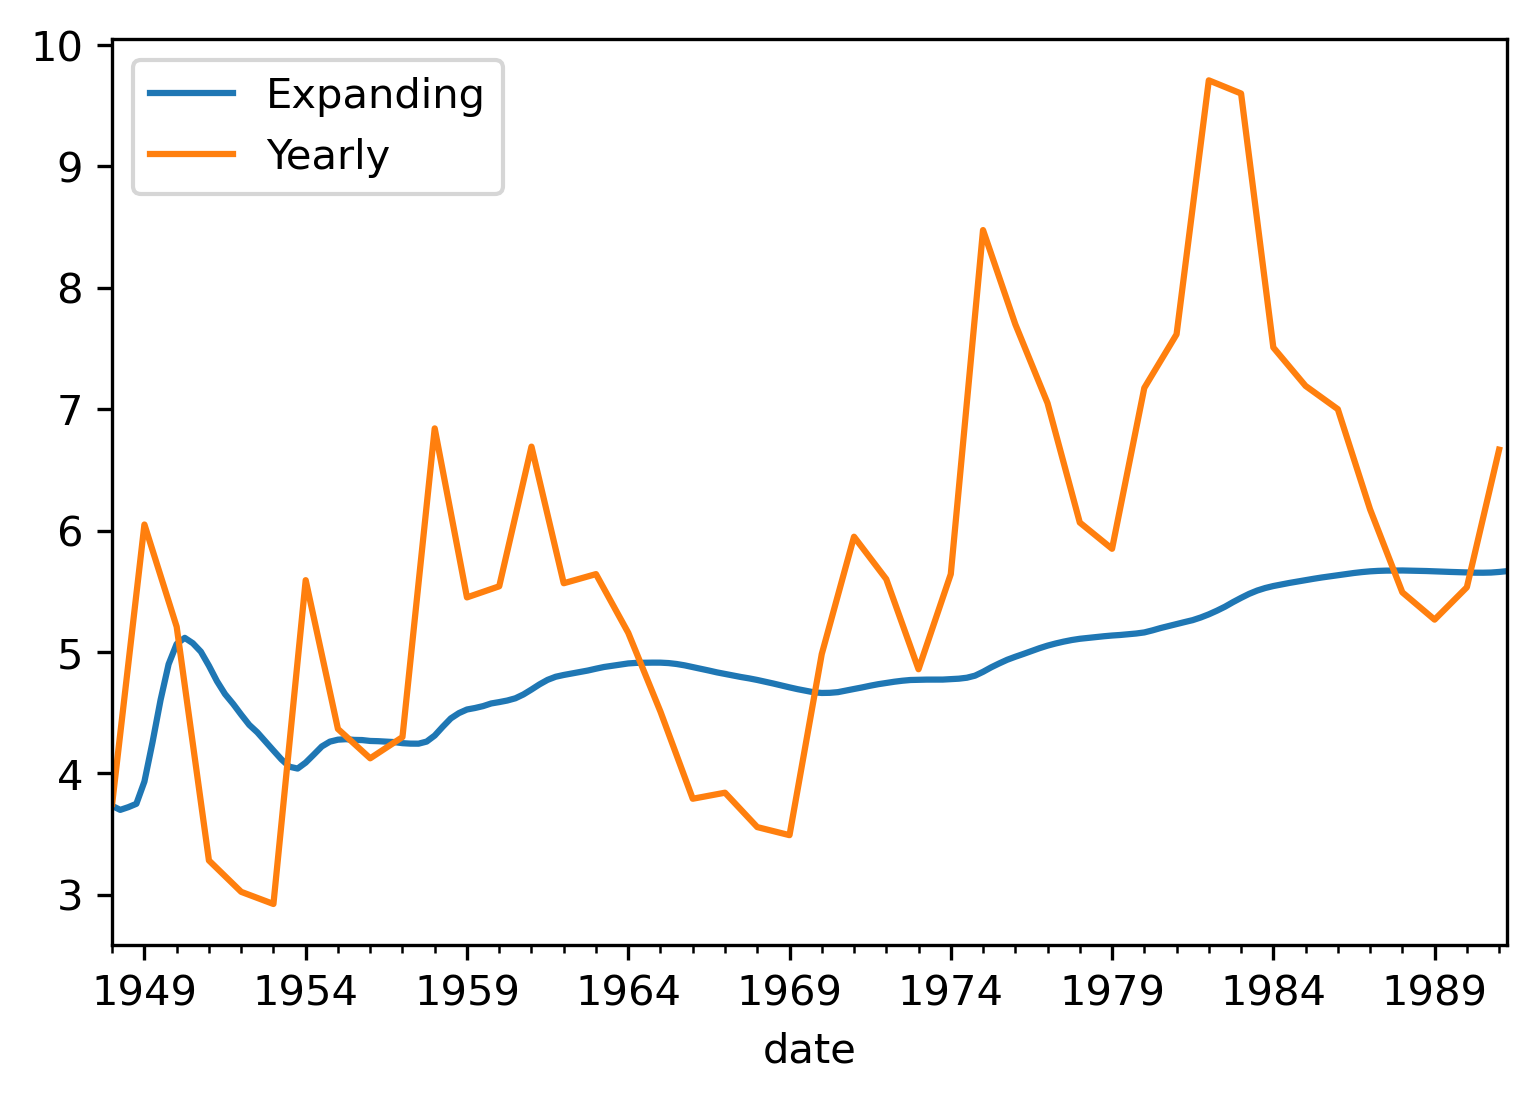

In [15]:
fg, ax = plt.subplots(dpi=300)
u['unemployment_rate'].expanding().mean().plot(ax=ax, label='Expanding');
u['unemployment_rate'].resample('Y').mean().plot(ax=ax, label='Yearly');
ax.legend();

### 6) Calculate and plot the exponentially weighted sum along with the rolling sum.

Pandas function `ewm()` is used to calculate the exponential weights moving average where you need to define the 'halflife' parameter (only applicable when using mean() aggregate).

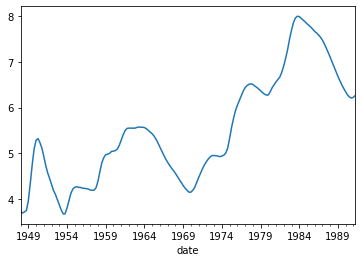

In [16]:
u['unemployment_rate'].ewm(halflife=10).mean().plot();

### 7) Difference the unemployment rate and plot.

Pandas `diff()` function returns the result of the difference between each value and the previous value, to assess the changes over each timestep.

<AxesSubplot:xlabel='date'>

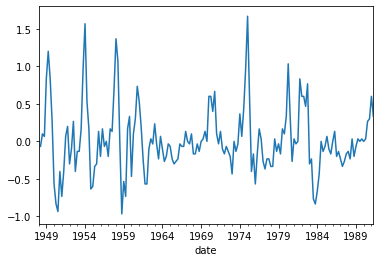

In [17]:
u['unemployment_rate'].diff().plot()

## Function to plot at different rolling windows

In [20]:
from sklearn import metrics

In [23]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = metrics.mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

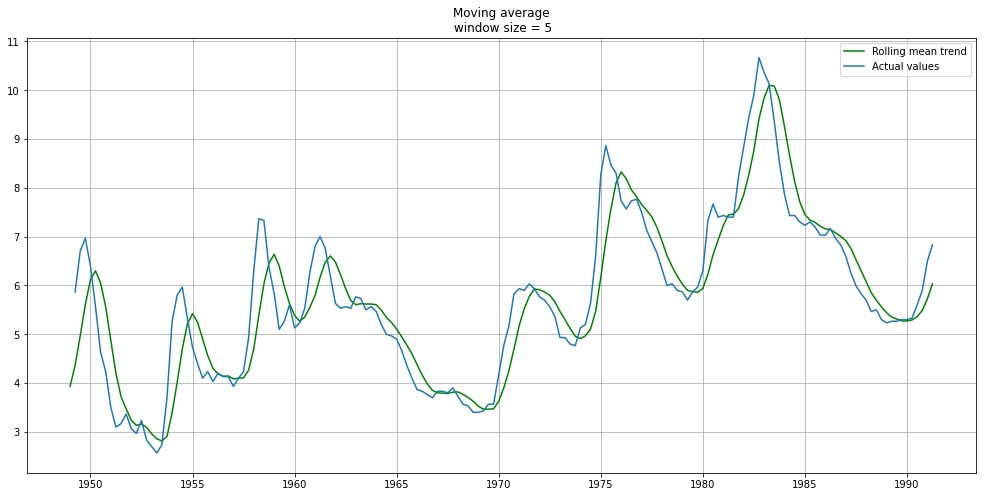

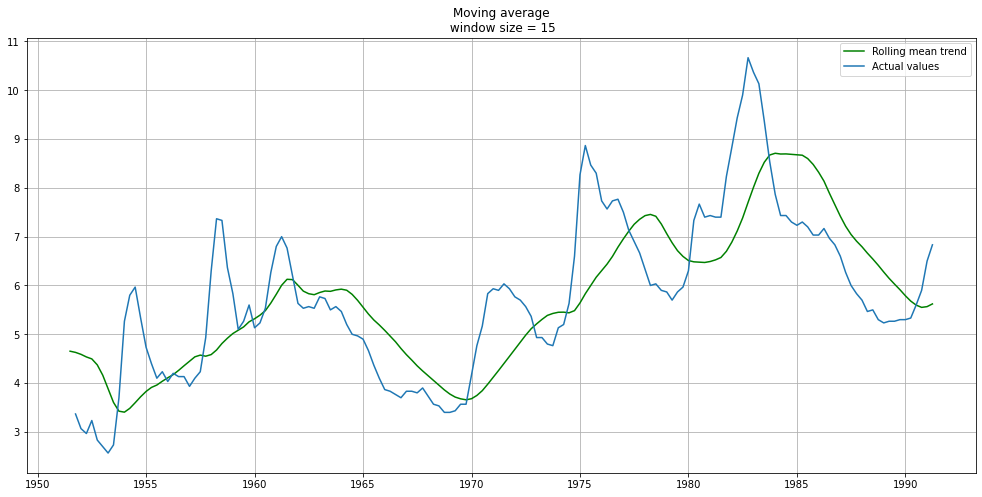

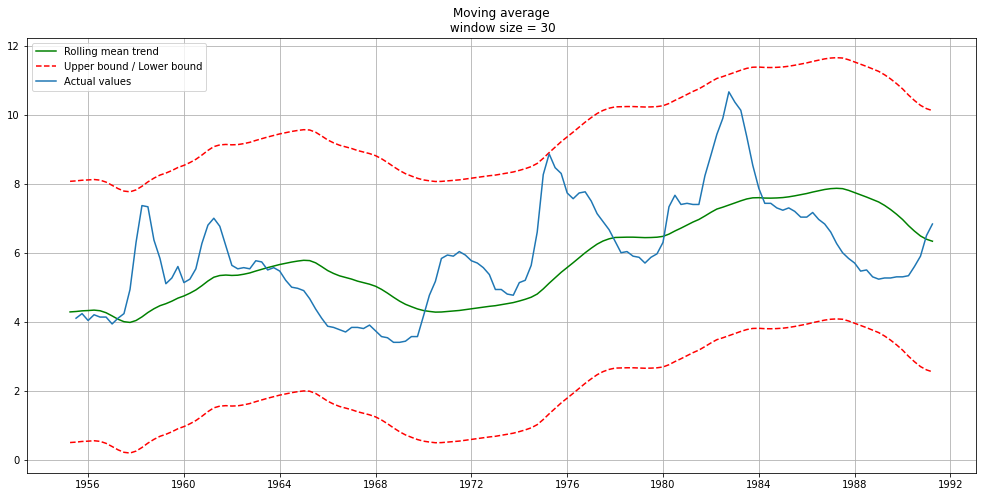

In [25]:
#Smooth by the previous 5 days (by week)
plot_moving_average(u.unemployment_rate, 5)

#Smooth by the previous month (30 days)
plot_moving_average(u.unemployment_rate, 15)

#Smooth by previous quarter (90 days)
plot_moving_average(u.unemployment_rate, 30, plot_intervals=True)

In [ ]:
# With time window of 5 observations, we cannot see a trend as too close to original data
# With time window of 15 observations, we see a smoother line indicating peaks and troughs
# With time window of 30 observations, we see an even smoother line - see downward trend at end for both 15 & 30

In [ ]:
# Other options to find even better trends are exponential_smoothing() and double_exponential_smoothing()